<a href="https://colab.research.google.com/github/ambroz72/Data-Analytics---BSBI/blob/master/Social%20Media%20Sentiments%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('sentimentdataset.csv')

In [6]:
data

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [7]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [8]:
data.drop(columns='Unnamed: 0.1',inplace = True)

In [9]:
data.rename(columns={'Unnamed: 0':'Id'},inplace=True)

In [10]:
data.isnull().sum()

,0
Id,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0
Country,0


In [11]:
data.dtypes

,0
Id,int64
Text,object
Sentiment,object
Timestamp,object
User,object
Platform,object
Hashtags,object
Retweets,float64
Likes,float64
Country,object


In [12]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month
data['Year'] = data['Timestamp'].dt.year


In [13]:
data['Text'] = data['Text'].str.strip()
data['Sentiment'] = data['Sentiment'].str.strip()
data['User'] = data['User'].str.strip()
data['Platform'] = data['Platform'].str.strip()
data['Hashtags'] = data['Hashtags'].str.strip()
data['Country'] = data['Country'].str.strip()

In [14]:
data.head(1)

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12


Text(0.5, 1.0, 'Top 10 Sentiments')

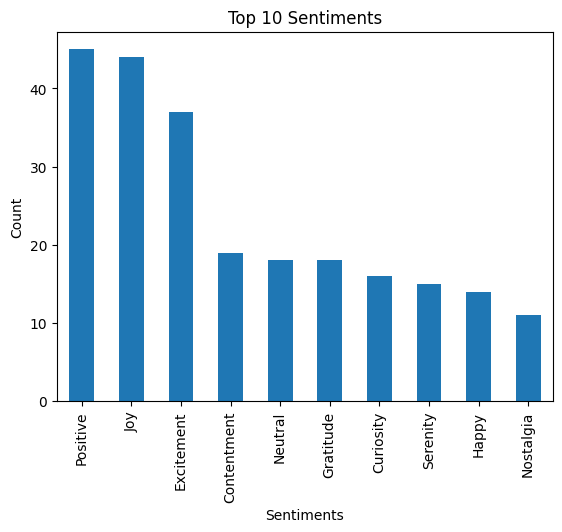

In [15]:
data['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Top 10 Sentiments')

In [16]:
data['Platform'].value_counts()

,count
Platform,
Instagram,258
Twitter,243
Facebook,231


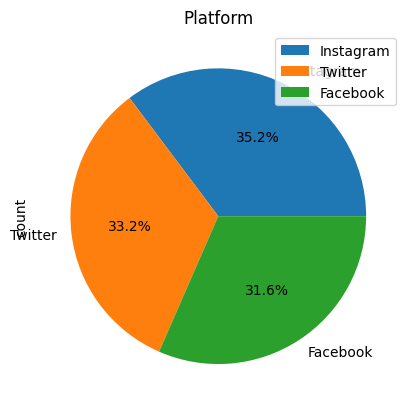

In [17]:
data['Platform'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Platform')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Top 10 Countries')

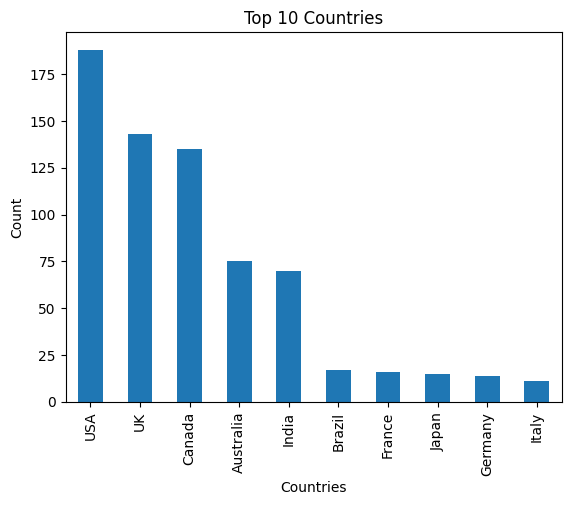

In [18]:
data['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Top 10 Countries')

Text(0.5, 1.0, 'Top 10 hasgtags')

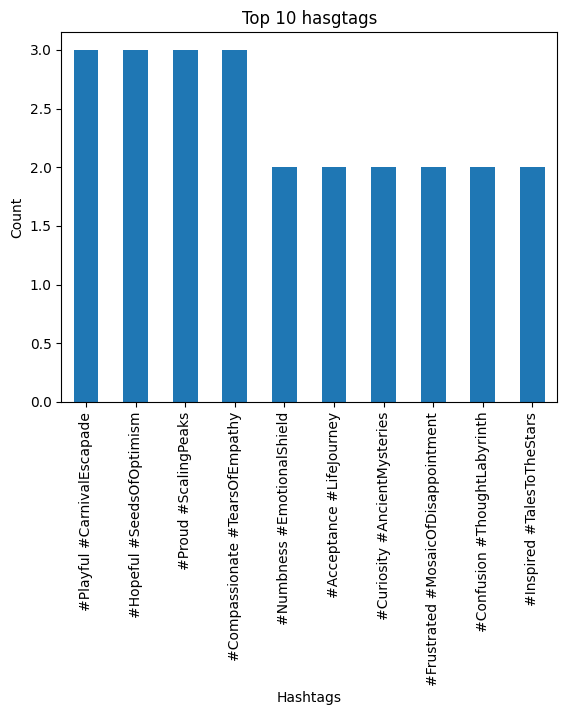

In [19]:
data['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 10 hasgtags')

In [20]:
data.describe()

,Id,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,2020-12-08 21:37:38.196721408,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
min,0.000000,2010-05-15 15:30:00,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,2019-03-08 17:27:30,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,2021-09-20 14:30:00,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,2023-02-26 11:48:45,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,2023-10-22 20:45:00,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000
std,212.428936,NaN,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414


In [21]:
ncs = data[['Day','Month','Year','Likes','Retweets']]
for col in ncs.columns:
  print(f'Minimum{col}:{data[col].min()} | Maximum {col} :{data[col].max()}')

MinimumDay:1 | Maximum Day :31
MinimumMonth:1 | Maximum Month :12
MinimumYear:2010 | Maximum Year :2023
MinimumLikes:10.0 | Maximum Likes :80.0
MinimumRetweets:5.0 | Maximum Retweets :40.0


In [ ]:
# (Relationship b/w column )- top 10 hasgtags retweeted

Text(0.5, 1.0, 'Top 10 Hashtags')

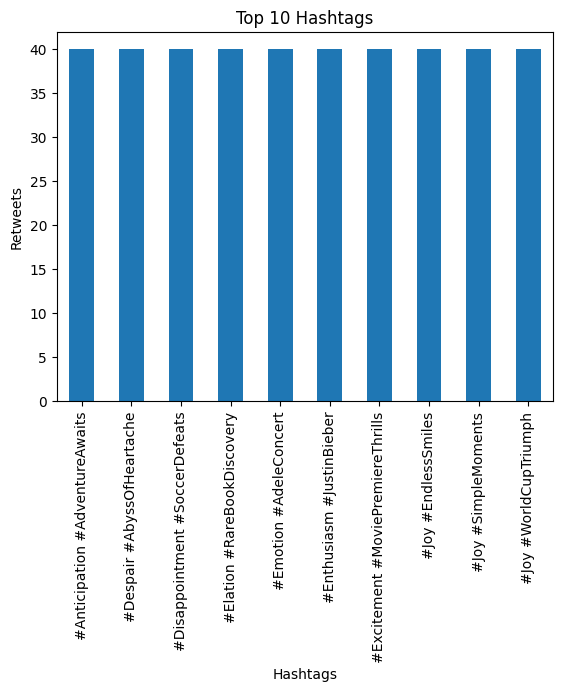

In [22]:
hr = data.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Hashtags')
plt.ylabel('Retweets')
plt.title('Top 10 Hashtags')

In [ ]:
# what is the platform top liked by users?

Text(0.5, 1.0, 'Top 10 Platform')

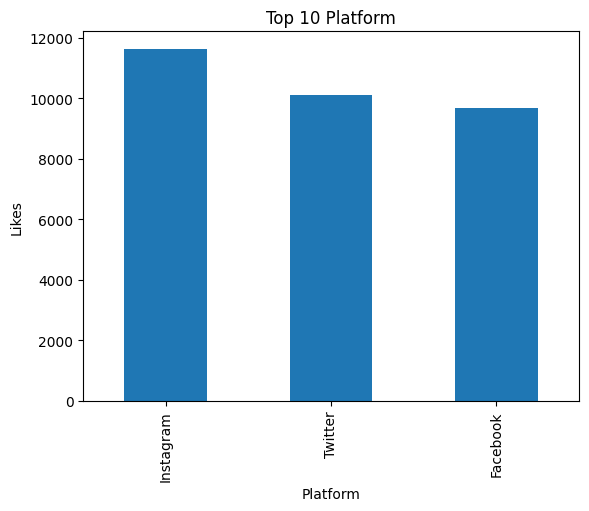

In [23]:
top_like_platform = data.groupby('Platform')['Likes'].sum().nlargest(10)
top_like_platform.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Likes')
plt.title('Top 10 Platform')

In [ ]:
#what is the most country liked posts?

Text(0.5, 1.0, 'Top 10 Countries')

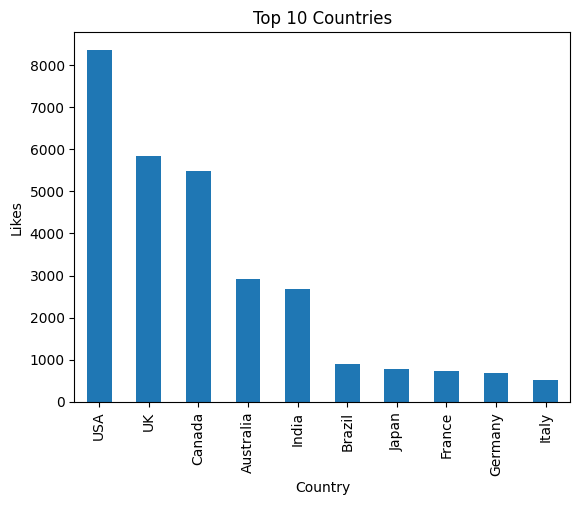

In [24]:
top_country_liked_post = data.groupby('Country')['Likes'].sum().nlargest(10)
top_country_liked_post.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Likes')
plt.title('Top 10 Countries')

In [25]:
fb=data[data['Platform']=='Facebook']
tw = data[data['Platform']=='Twitter']
In = data[data['Platform']=='Instagram']

In [ ]:
#Facebook - top 10 hashtag retweeted

Text(0.5, 1.0, 'Top 10 Hashtags')

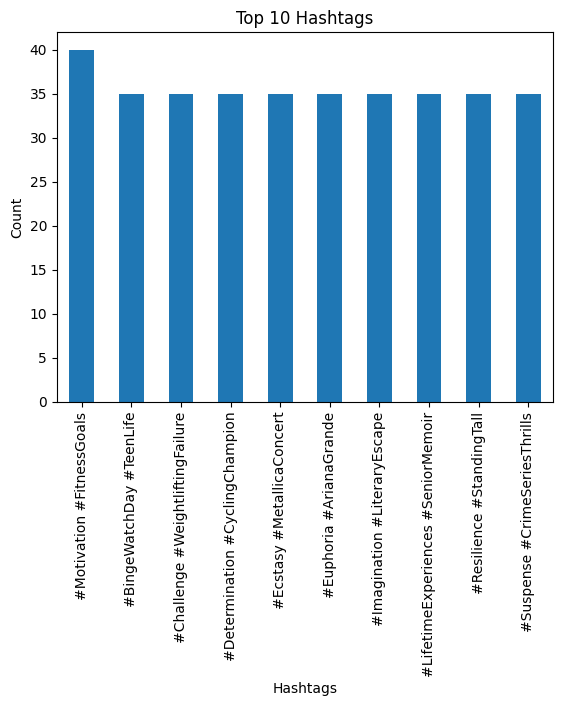

In [26]:
H_R_F = fb.groupby('Hashtags')['Retweets'].max().nlargest(10)
H_R_F.plot(kind='bar')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 10 Hashtags')

In [ ]:
# who user liked mostly?

Text(0.5, 1.0, 'Top 10 Users')

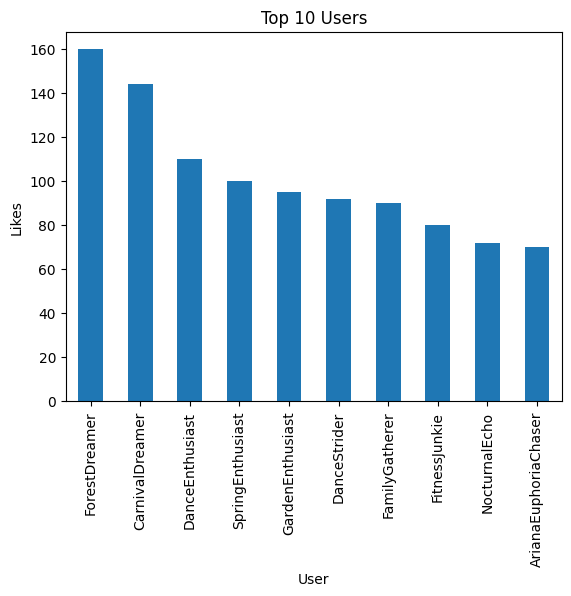

In [27]:
top_user_like=fb.groupby('User')['Likes'].sum().nlargest(10)
top_user_like.plot(kind='bar')
plt.xlabel('User')
plt.ylabel('Likes')
plt.title('Top 10 Users')

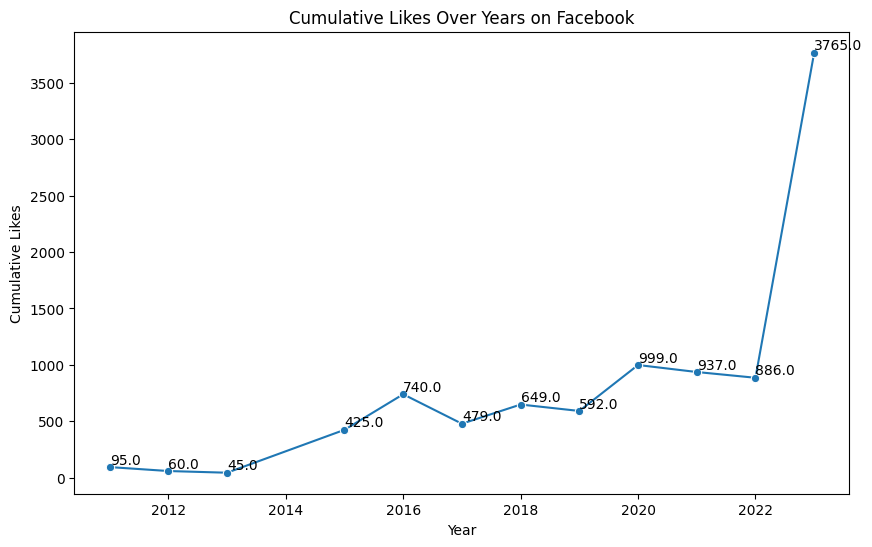

In [30]:
f = fb.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

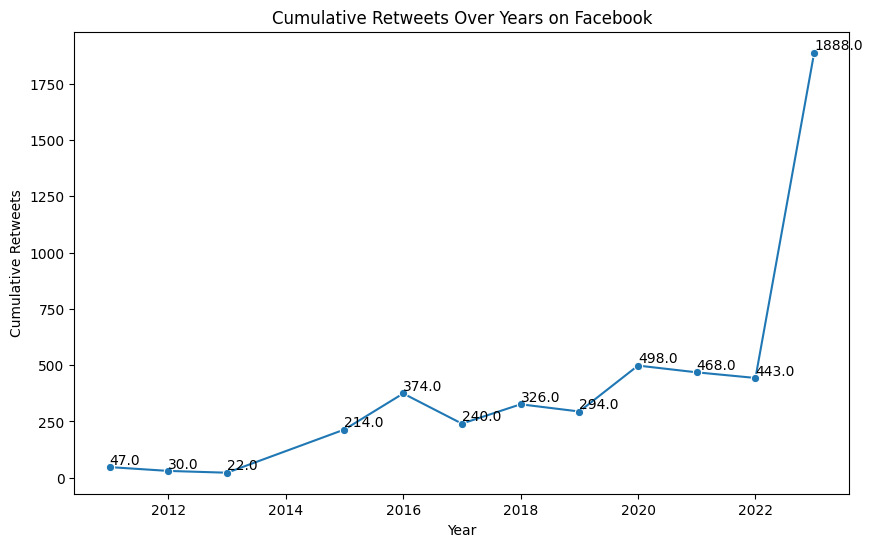

In [34]:
f = fb.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

In [ ]:
#Twitter - top 10 hashtag retweeted

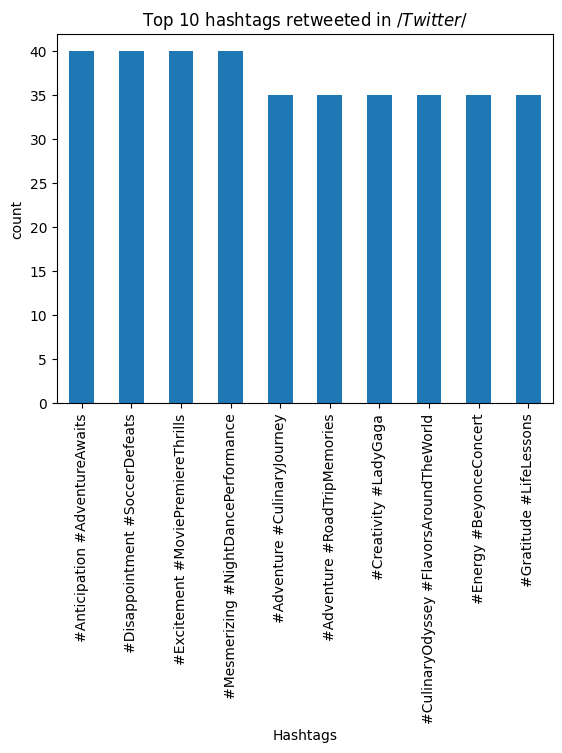

In [33]:
H_R_t=tw.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_t.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Twitter $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

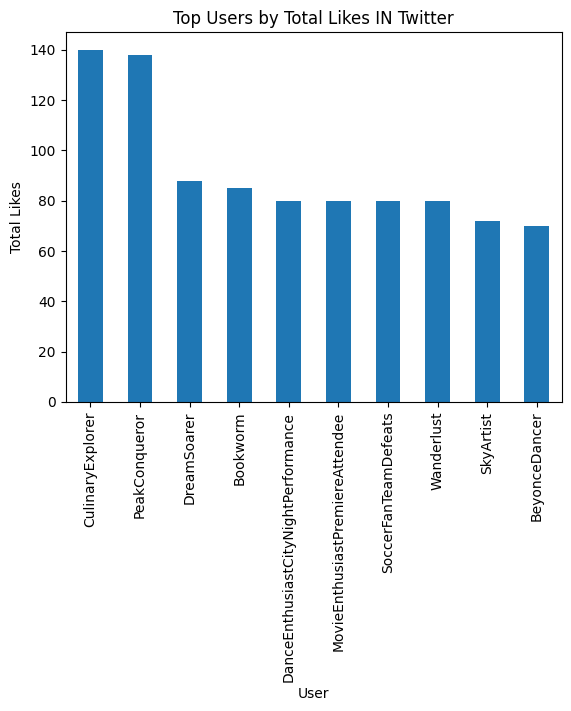

In [36]:
#who user liked mostly?

top_likes_platform_t = tw.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_t.plot(kind='bar')
plt.title('Top Users by Total Likes IN Twitter')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

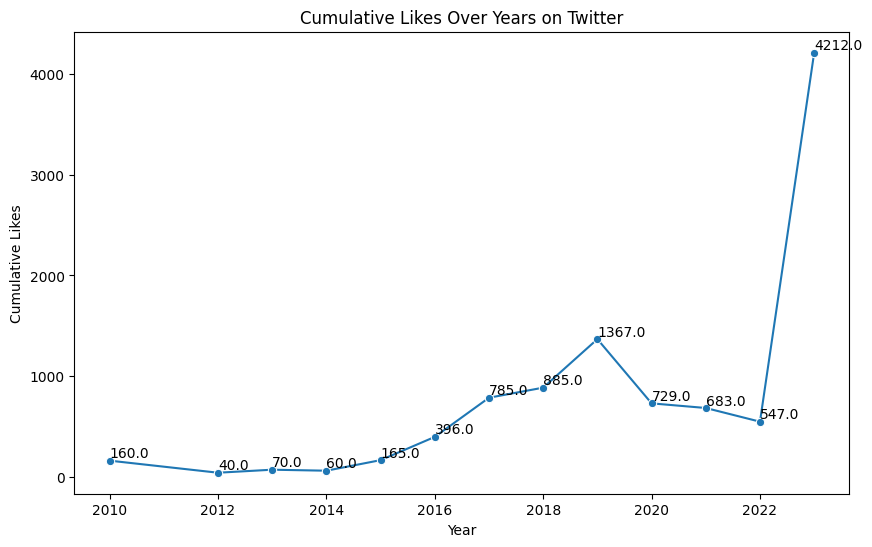

In [37]:
f = tw.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

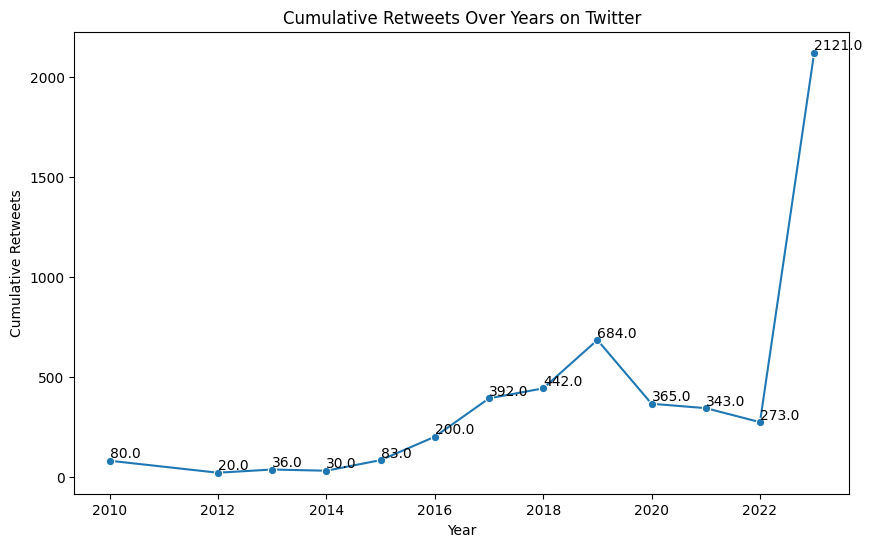

In [38]:
f = tw.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Twitter')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

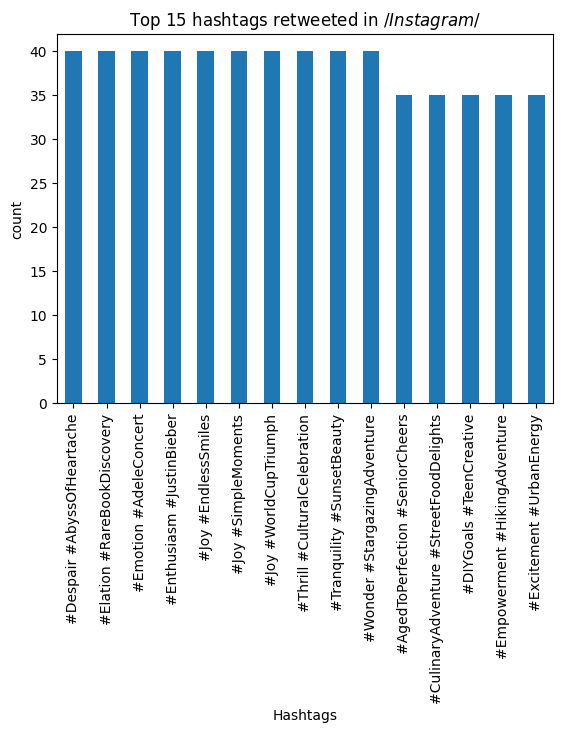

In [46]:
#Instagram - top 10 hastag retweeted
H_R_i=In.groupby('Hashtags')['Retweets'].max().nlargest(15).sort_values(ascending=False)
H_R_i.plot(kind='bar')
plt.title('Top 15 hashtags retweeted in $/ Instagram $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

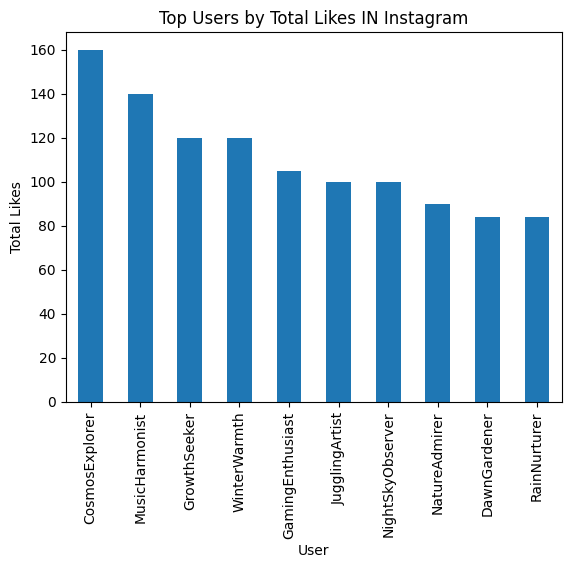

In [43]:
# who user liked most
top_likes_platform_i = In.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_i.plot(kind='bar')
plt.title('Top Users by Total Likes IN Instagram')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

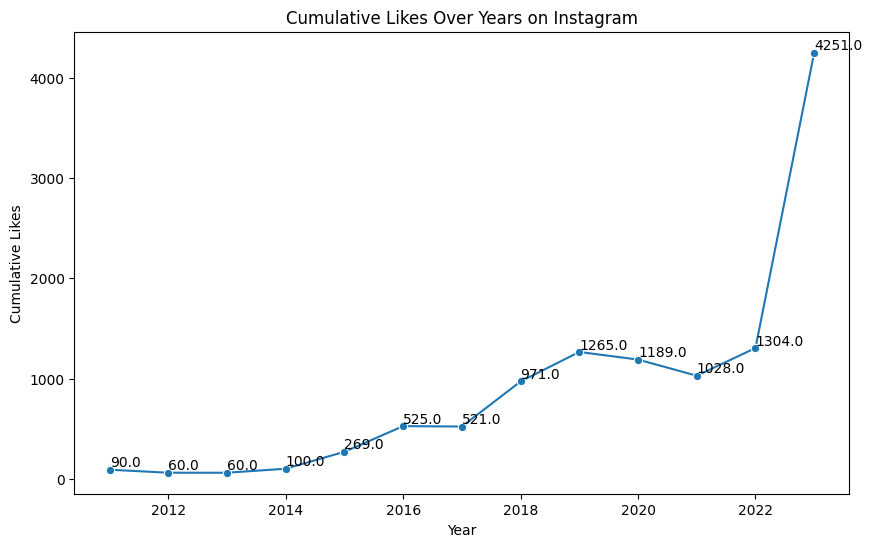

In [44]:
f = In.groupby('Year')['Likes'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Likes', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Likes'], str(value['Likes']), ha='left', va='bottom')

plt.title('Cumulative Likes Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Likes')

plt.show()

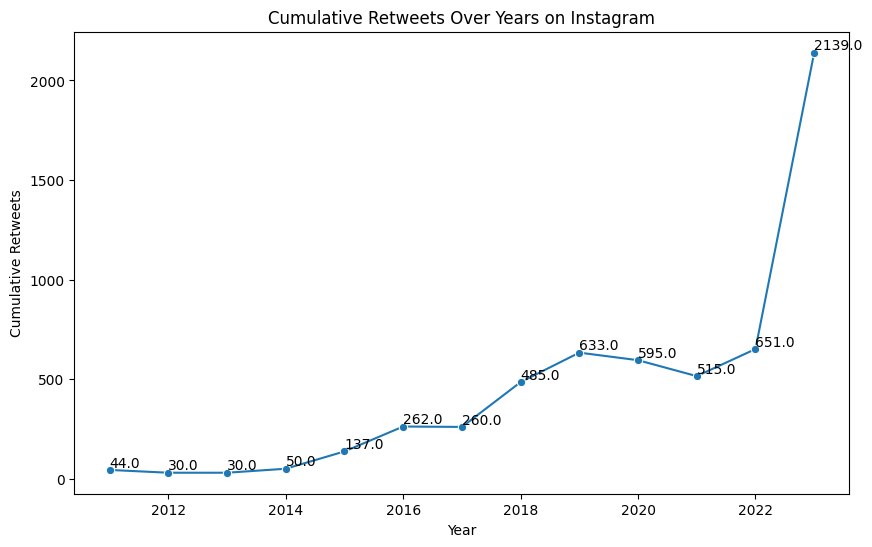

In [45]:
f = In.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Instagram')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()